# Applying the SRS: Vignettes from "Enabling interpretable machine learning for biological data with reliability scores"

Kaileigh Ahlquist


In [1]:
%%capture
import sys
#!{sys.executable} -m pip install swifr
!{sys.executable} -m pip install --upgrade swifr
!python -m pip show swifr

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

## Section 1

In [3]:
#Generating correlated gaussians
mean1 = np.array([-1., -1.])
mean2 = np.array([1., 1.])
mean3 = np.array([0.8, -0.8])
mean4 = np.array([-0.8,0.8])
mean5 = np.array([-0.5,0.])
mean6 = np.array([0.5,0.])
mean7 = np.array([-0.25,-0.25])
mean8 = np.array([0.25,0.25])
size = 1000
cov1 = np.array([[0.1, 0.085], [0.085, 0.1]])
vals1 = np.random.multivariate_normal(mean1, cov1, size)
vals2 = np.random.multivariate_normal(mean2, cov1, size)
cov2 = np.array([[-0.1, 0.085], [0.085, -0.1]])
vals3 = np.random.multivariate_normal(mean1, cov2, size)
vals4 = np.random.multivariate_normal(mean2, cov2, size)
cov3 = np.array([[0.18, 0.], [0., 0.18]])
vals5 = np.random.multivariate_normal(mean3, cov3, size)
vals6 = np.random.multivariate_normal(mean4, cov3, size)
cov4 = np.array([[0.25,0.],[0.,0.25]])
vals7 = np.random.multivariate_normal(mean5, cov4, size)
vals8 = np.random.multivariate_normal(mean6, cov4, size)
cov5 = np.array([[-0.2, 0.12], [0.12, -0.2]])
vals9 = np.random.multivariate_normal(mean7, cov5, size)
vals10 = np.random.multivariate_normal(mean8, cov5, size)
cov6 = np.array([[-0.25, 0.2], [0.2, -0.25]])
cov7 = np.array([[0.3,0.],[0.,0.3]])
mean9 = np.array([-0.5, -0.5])
vals11 = np.random.multivariate_normal(mean8, cov6, size)
vals12 = np.random.multivariate_normal(mean9, cov7, size)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  from ipykernel import kernelapp as app
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.


(-2, 2)

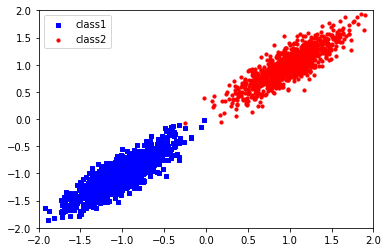

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals1[:, 0], vals1[:, 1], s=10, c='b', marker="s", label='class1')
ax1.scatter(vals2[:, 0], vals2[:, 1], s=10, c='r', marker="o", label='class2')
plt.legend(loc='upper left');
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(-2, 2)

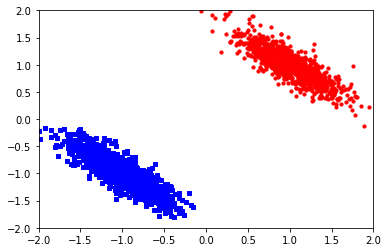

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals3[:, 0], vals3[:, 1], s=10, c='b', marker="s", label='first')
ax1.scatter(vals4[:, 0], vals4[:, 1], s=10, c='r', marker="o", label='second')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(-2, 2)

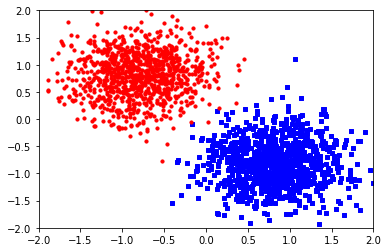

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals5[:, 0], vals5[:, 1], s=10, c='b', marker="s", label='first')
ax1.scatter(vals6[:, 0], vals6[:, 1], s=10, c='r', marker="o", label='second')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(-2, 2)

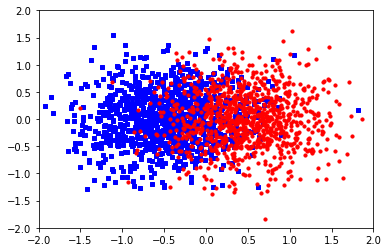

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals7[:, 0], vals7[:, 1], s=10, c='b', marker="s", label='first')
ax1.scatter(vals8[:, 0], vals8[:, 1], s=10, c='r', marker="o", label='second')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(-2, 2)

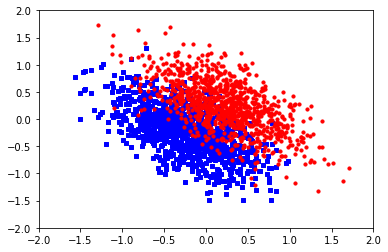

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals9[:, 0], vals9[:, 1], s=10, c='b', marker="s", label='first')
ax1.scatter(vals10[:, 0], vals10[:, 1], s=10, c='r', marker="o", label='second')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

(-2, 2)

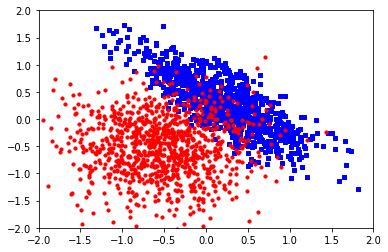

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(vals11[:, 0], vals11[:, 1], s=10, c='b', marker="s", label='first')
ax1.scatter(vals12[:, 0], vals12[:, 1], s=10, c='r', marker="o", label='second')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [ ]:
%%capture
!swifr_train --path /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1

## Section 2

In [10]:
%%capture
!swifr_train --path /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1

In [11]:
!swifr_test --path2trained /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1 --file /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1/classified/test_set.txt --pi 0.5 0.5

classes:
['wheat_2', 'wheat_3']
Using priors:
p(wheat_2) = 0.5
p(wheat_3) = 0.5


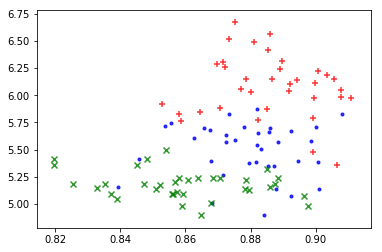

In [12]:
df = np.loadtxt('/Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1/classified/test_set_classified', skiprows=1, usecols=[3,4,8,9,10,11,12,13])
#0-1: C, l_kernel, 2:class,3-4:pi,5-6:swifr_prob,7-8:reliability
colors = ['blue','red','green']
colors = ['blue','red','green']
markers = ['.','+','x']
ax = plt.gca()
for i in range(3):
    mask = (df[:,2] == i+1)
    ax.scatter(df[mask, 0], df[mask, 1], alpha=0.8, c=colors[i], marker=markers[i])

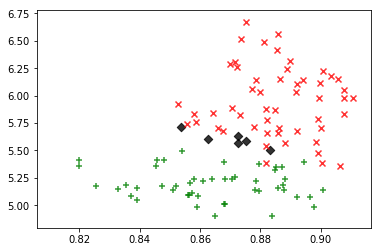

In [13]:
col = df[:,6]
conditions = [col >= 0.9, (col < 0.9) & (col > 0.1), col <= 0.1]
choices = ["1", '2', '3']
new = np.select(conditions, choices, default = np.nan)
df2 = np.insert(df,8, new,axis=1)
colors = ['green','black','red']
markers = ['+','D','x']
ax = plt.gca()
for i in range(3):
    mask = (df2[:,8] == i+1)
    ax.scatter(df2[mask, 0], df2[mask, 1], alpha=0.8, c=colors[i], marker=markers[i])

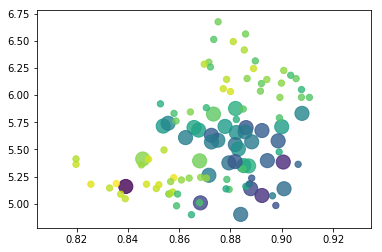

In [14]:
col = df[:,2]
conditions = [col == 1, col == 2, col == 3]
choices = ["200", '40', '40']
new2 = np.select(conditions, choices, default = np.nan)
df2 = np.insert(df,8, new2,axis=1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df2[:,0],df2[:,1],c=df2[:,7], s=df2[:,8],alpha=0.8)